# 随机数


In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt


In [2]:
npr.rand(10)

array([0.08275209, 0.11750888, 0.76700392, 0.16897749, 0.51576769,
       0.1967899 , 0.43622333, 0.23122423, 0.59079834, 0.62064351])

In [3]:
npr.rand(5,5)

array([[0.09734865, 0.86532204, 0.79499561, 0.68570571, 0.87901138],
       [0.25183986, 0.86720438, 0.58995032, 0.34908446, 0.45635514],
       [0.85725769, 0.47402677, 0.52037702, 0.03463278, 0.5946351 ],
       [0.19055103, 0.19003565, 0.95111624, 0.02865445, 0.45270853],
       [0.62749645, 0.67542585, 0.76286121, 0.84138173, 0.93440438]])

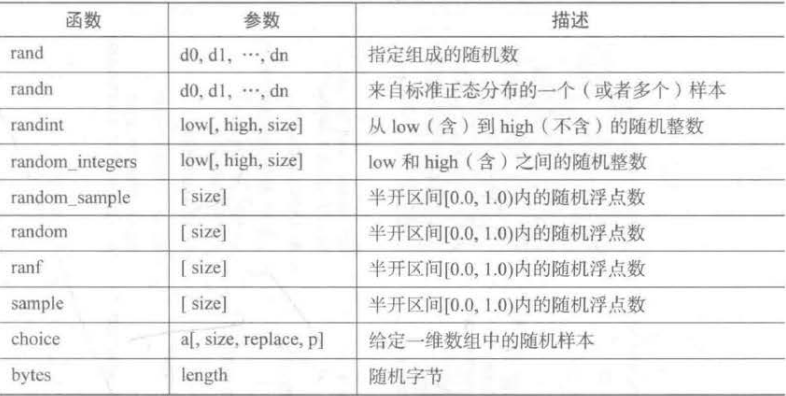

In [4]:
sample_size=500
rn1=npr.rand(sample_size,3)
rn2=npr.randint(0,10,sample_size)
rn3=npr.sample(size=sample_size)
a=[0,25,50,75,100]
rn4=npr.choice(a,size=sample_size)

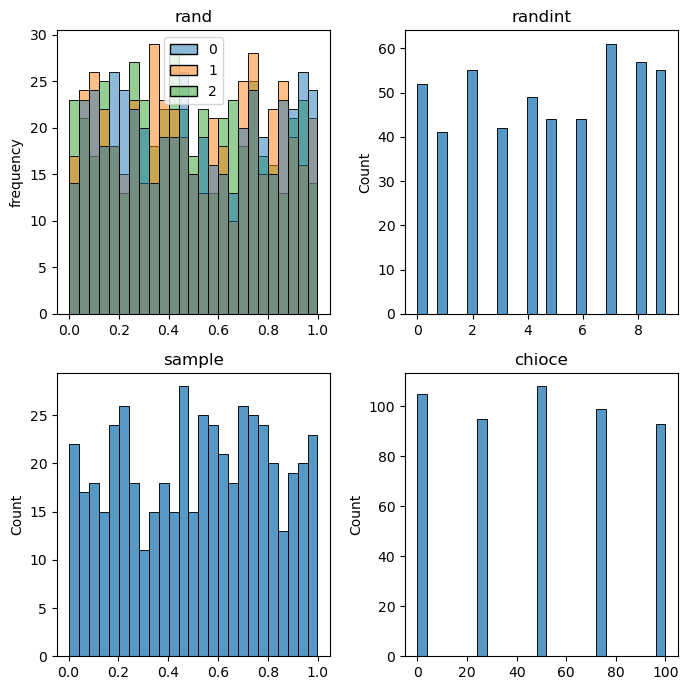

In [5]:
import seaborn as sns
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(7,7))

sns.histplot(rn1,bins=25,ax=axes[0,0])
axes[0,0].set_title('rand')
axes[0,0].set_ylabel('frequency')

sns.histplot(rn2,bins=25,ax=axes[0,1])
axes[0,1].set_title('randint')

sns.histplot(rn3,bins=25,ax=axes[1,0])
axes[1,0].set_title('sample')

sns.histplot(rn4,bins=25,ax=axes[1,1])
axes[1,1].set_title('chioce')

plt.tight_layout()

In [6]:
sample_size=500
rn1=npr.standard_normal(sample_size)
rn2=npr.normal(100,20,sample_size)
rn3=npr.chisquare(df=0.5,size=sample_size)
rn4=npr.poisson(lam=1.0,size=sample_size)

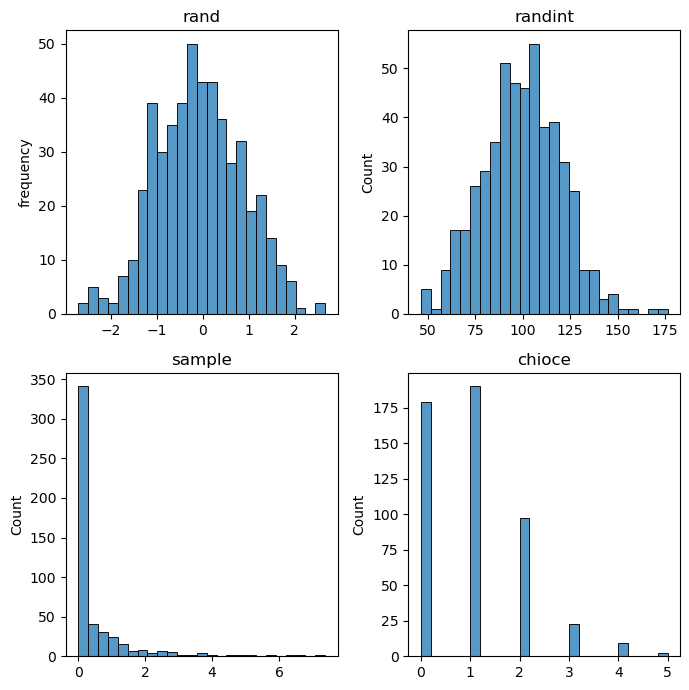

In [7]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(7,7))

sns.histplot(rn1,bins=25,ax=axes[0,0])
axes[0,0].set_title('rand')
axes[0,0].set_ylabel('frequency')

sns.histplot(rn2,bins=25,ax=axes[0,1])
axes[0,1].set_title('randint')

sns.histplot(rn3,bins=25,ax=axes[1,0])
axes[1,0].set_title('sample')

sns.histplot(rn4,bins=25,ax=axes[1,1])
axes[1,1].set_title('chioce')

plt.tight_layout()

# 模拟
$$
S_{T}=S_{\theta}e^{((r-\frac{1}{2}\sigma^{2})T+\sigma \sqrt{T}z)}
$$

$S_{T}$：T日的指数水平

$r$:恒定无风险利率

$\sigma$:S的恒定波动率

$z$：标准正太分布随机变量



In [8]:
S0=100
r=0.05
sigma=0.25
T=2.0
I=10000
ST1=S0*np.exp((r-0.5*sigma**2)*T+sigma*np.sqrt(T)*npr.standard_normal(I))

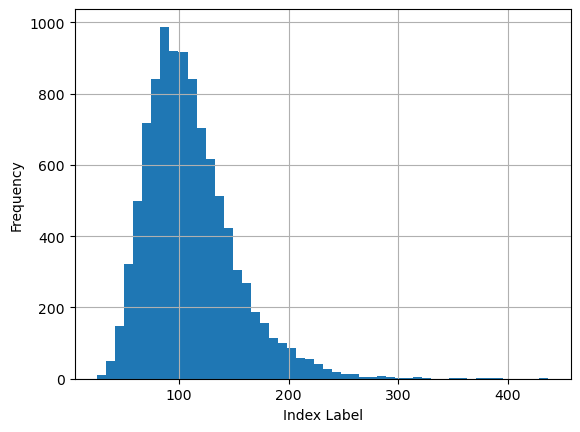

In [9]:
plt.hist(ST1,bins=50)
plt.xlabel('Index Label')
plt.ylabel('Frequency')
plt.grid(True)

In [10]:
ST2=S0*npr.lognormal((r-0.5*sigma**2)*T,sigma*np.sqrt(T),size=I)

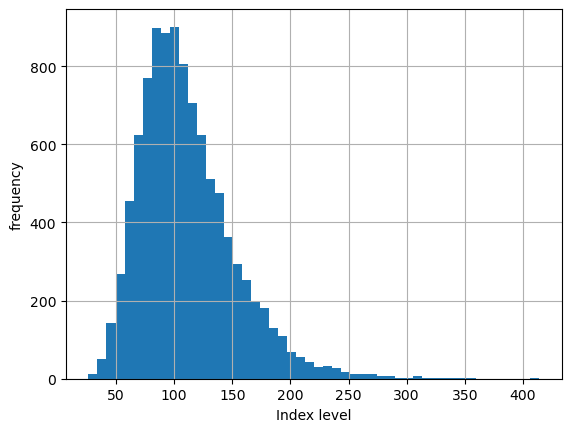

In [11]:
plt.hist(ST2,bins=50)
plt.xlabel('Index level')
plt.ylabel('frequency')
plt.grid(True)

In [12]:
import scipy.stats as scs
def print_statistics(a1,a2):
    sta1=scs.describe(a1)
    sta2=scs.describe(a2)
    
    print('%14s %14s %14s'%('statistic','data set 1','data set 2'))
    print(45*'-')
    print('%14s %14.3f %14.3f'%('size',sta1[0],sta2[0]))
    print('%14s %14.3f %14.3f'%('min',sta1[1][0],sta2[1][0]))
    print('%14s %14.3f %14.3f'%('max',sta1[1][1],sta2[1][1]))
    print('%14s %14.3f %14.3f'%('mean',sta1[2],sta2[2]))
    print('%14s %14.3f %14.3f'%('std',np.sqrt(sta1[3]),
                               np.sqrt(sta2[3])))
    print('%14s %14.3f %14.3f'%('skew',sta1[4],sta2[4]))
    print('%14s %14.3f %14.3f'%('kurtosis',sta1[5],sta2[5]))

In [13]:
print_statistics(ST1,ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         25.685         26.266
           max        436.625        414.050
          mean        110.595        110.822
           std         40.424         40.774
          skew          1.221          1.143
      kurtosis          3.008          2.341


# 随机过程
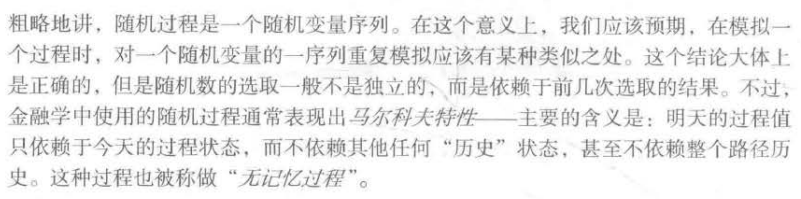

**几何布朗运动**

_Black-Scholes-Merton的随机微分方程_
$$
dS_{t}=rS_{t}dt+\sigma S_{t}dZ_{t}
$$

_在Black-Scholes-Merton中动态模拟指数水平_
$$
S_{t}=S_{t-\delta t}exp((r-\frac{1}{2}\sigma^{2}\delta t+\sigma\sqrt{\delta tz_{t}}))
$$



In [14]:
I=10000
M=50
dt=T/M
S=np.zeros((M+1,I))
S[0]=S0
for t in range(1,M+1):
    S[t]=S[t-1]*np.exp((r-0.5*sigma**2)*dt+sigma*np.sqrt(dt)*npr.standard_normal(I))

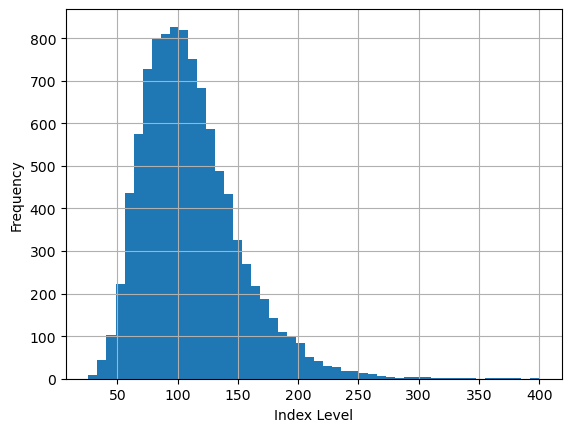

In [15]:
plt.hist(S[-1],bins=50)
plt.xlabel('Index Level')
plt.ylabel('Frequency')
plt.grid(True)

In [16]:
print_statistics(S[-1],ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         25.938         26.266
           max        400.082        414.050
          mean        110.883        110.822
           std         40.203         40.774
          skew          1.127          1.143
      kurtosis          2.495          2.341


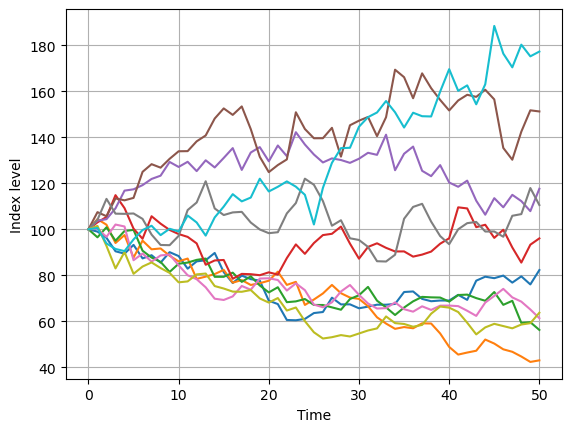

In [17]:
plt.plot(S[:,:10],lw=1.5)
plt.xlabel('Time')
plt.ylabel('Index level')
plt.grid(True)

**平方根扩散**

另一类重要的金融过程是均值回归过程，用于建立短期利率或者波动性过程的模型，流行和广泛使用的模型之一是平方根扩散

_平方根扩散的随机微分方程_
$$
dx_{t}=k(\theta-x_{t})dt+\sigma\sqrt{x_{t}}dZ_{t}
$$

$x_{t}$：日期t的过程水平，该值呈卡方分布

$k$:均值回归因子

$\theta$:长期过程均值

$\theta$:恒定波动率参数

$Z$:标准布朗运动

_平方根扩散的欧拉离散化_
$$
\hat{x_{t}}=\hat{x_{s}}+k(\theta-\hat{x_{s}}^{+})\delta t+\sigma\sqrt{\hat{x_{s}}^{+}}\sqrt{\delta t}z_{t}
$$

In [18]:
x0=0.05
kappa=3.0
theta=0.02
sigma=0.1

In [19]:
I=10000
M=50
dt=T/M
def srd_euler():
    xh=np.zeros((M+1,I))
    x1=np.zeros_like(xh)
    xh[0]=x0
    x1[0]=x0
    for t in range(1,M+1):
        xh[t]=(xh[t-1]+kappa*(theta-np.maximum(xh[t-1],0))*dt+sigma*np.sqrt(np.maximum(xh[t-1],0))*np.sqrt(dt)*npr.standard_normal(I))
    x1=np.maximum(xh,0)
    print(x1)
    return x1
x1=srd_euler()

[[0.05       0.05       0.05       ... 0.05       0.05       0.05      ]
 [0.04068455 0.04548174 0.04309385 ... 0.04952221 0.04492266 0.03583256]
 [0.03908797 0.03528903 0.041175   ... 0.05043561 0.04129479 0.03382206]
 ...
 [0.02457128 0.01103139 0.02023622 ... 0.02135745 0.01928425 0.01877795]
 [0.02536597 0.00892064 0.02172513 ... 0.0262748  0.0175972  0.01884542]
 [0.01792818 0.00836808 0.02655511 ... 0.02432551 0.01719545 0.01740773]]


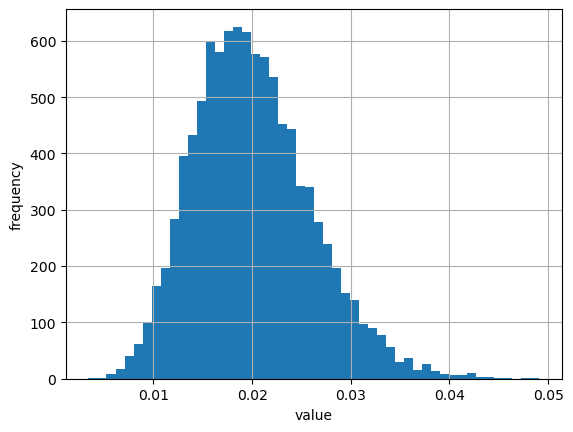

In [20]:
plt.hist(x1[-1],bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)

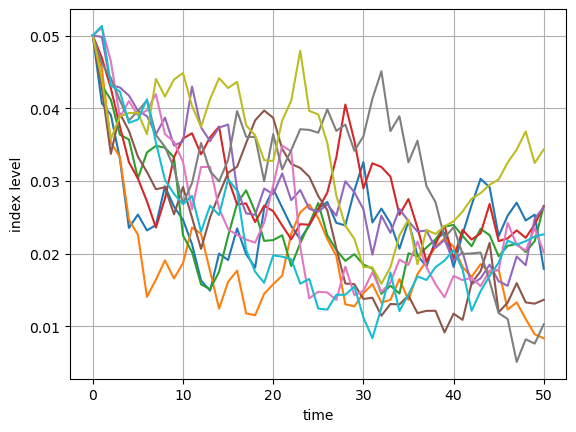

In [21]:
plt.plot(x1[:,:10],lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)

现在寻求更加精确的结果，下面公式提出了基于自由度$df=\frac{4\theta k}{\sigma^2}$、非中心参数$nc=\frac{4ke^{k\delta t}}{\sigma^{2}(1-e^{-k\delta t})}x$的卡方分布平方根扩散的精确离散化格式
$$
x_{t}=\frac{\sigma^{2}(1-e^{-k\delta t)}}{4k}x^{+2}_{d}(\frac{4ke^{-k\delta t}}{\sigma^{2}(1-e^{-k\delta t})})x_{s}
$$

In [22]:
def srd_extract():
    x2=np.zeros((M+1,I))
    x2[0]=x0
    for t in range(1,M+1):
        df=(4*theta*kappa)/sigma**2
        c=(sigma**2*(1-np.exp(-kappa*dt)))/(4*kappa)
        nc=np.exp(-kappa*dt)/c*x2[t-1]
        x2[t]=c*npr.noncentral_chisquare(df,nc,size=I)
    return x2

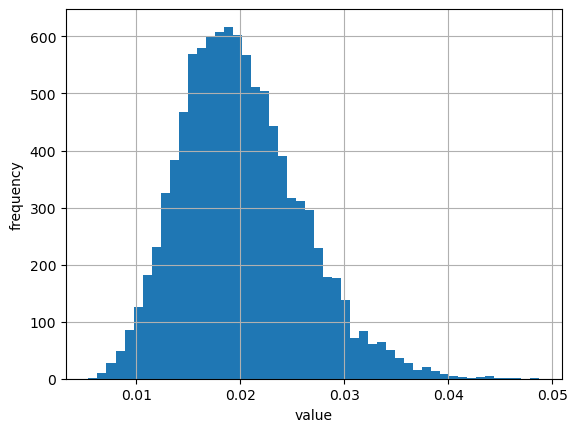

In [23]:
x2=srd_extract()
plt.hist(x2[-1],bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)

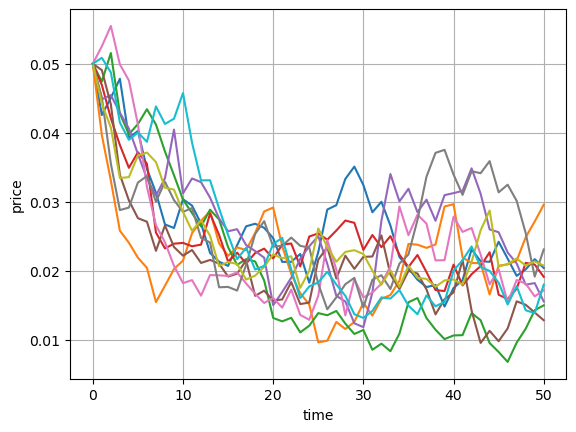

In [24]:
plt.plot(x2[:,:10],lw=1.5)
plt.xlabel('time')
plt.ylabel('price')
plt.grid(True)

In [25]:
print_statistics(x1[-1],x2[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min          0.003          0.005
           max          0.049          0.049
          mean          0.020          0.020
           std          0.006          0.006
          skew          0.552          0.580
      kurtosis          0.451          0.434


**随机波动率**

Heston随机波动率模型的随机微分方程
$$
dS_{t}=rS_{t}dt+\sqrt{v_{t}}S_{t}dZ_{t}^{1}
$$
$$
dv_{t}=k_{v}(\theta-v_{t})dt+\sigma_{v}\sqrt{v_{t}}dZ_{t}^{2}
$$
$$
dZ_{t}^{1}Z_{t}^{2}=\rho
$$
参数$\rho$代表两个布朗运动的瞬时相关性，这让我们可以解释一个典型事实——杠杆效应，该效应本质上指的是波动性在困难时期（衰退市场）中上升，而在牛市（上升市场）时下降

In [26]:
S0=100
r=0.05
v0=0.1
kappa=3.0
theta=0.25
sigma=0.1
rho=0.6
T=1.0

In [27]:
corr_mat=np.zeros((2,2))
corr_mat[0,:]=[1,rho]
corr_mat[1,:]=[rho,1]
cho_mat=np.linalg.cholesky(corr_mat)

In [28]:
M=50
I=10000
ran_num=npr.standard_normal((2,M+1,I))
dt=T/M
v=np.zeros_like(ran_num[0])
vh=np.zeros_like(v)
v[0]=v0
vh[0]=v0
S=np.zeros_like(ran_num[0])
S[0]=S0
for t in range(1,M+1):
    ran=np.dot(cho_mat,ran_num[:,t,:])#得到具有所需相关性的随机变量
    vh[t]=(vh[t-1]+kappa*(theta-np.maximum(vh[t-1],0))*dt+sigma*np.sqrt(np.maximum(vh[t-1],0))*np.sqrt(dt)*ran[1])
    v=np.maximum(vh,0)
    S[t]=S[t-1]*np.exp((r-0.5*v[t])*dt+np.sqrt(v[t])*ran[0]*np.sqrt(dt))

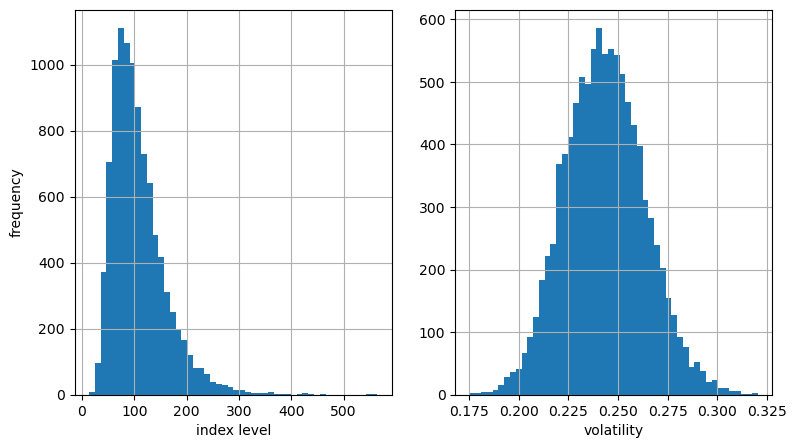

In [29]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(9,5))
ax1.hist(S[-1],bins=50)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.grid(True)
ax2.hist(v[-1],bins=50)
ax2.set_xlabel('volatility')
ax2.grid('True')

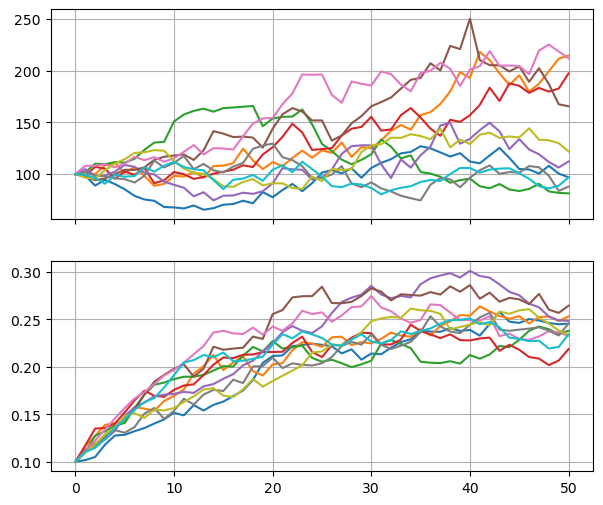

In [30]:
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True,figsize=(7,6))
ax1.plot(S[:,:10],lw=1.5)
ax1.grid(True)
ax2.plot(v[:,:10],lw=1.5)
ax2.grid(True)

In [31]:
print_statistics(S[-1],v[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         13.687          0.175
           max        564.734          0.320
          mean        108.429          0.243
           std         51.748          0.020
          skew          1.607          0.145
      kurtosis          4.994         -0.019


**跳跃扩散**

_Merton跳跃扩散模型的随机微分方程_
$$
dS_{t}=(r-r_{j})S_{t}dt+\sigma S_{t}dZ_{t}+J_{t}S_{t}dN_{t}
$$

$S_{t}$:t日的指数水平

$r$:恒定无风险短期利率

$r_{j}=\lambda (e^{\mu_{j}+\frac{\delta^{2}}{2}}-1)$:维持风险中立性的跳跃漂移校正

$\alpha$:S的恒定波动率

$Z_{t}$:标准布朗运动

$J_{t}$:t日呈....分布的跳跃

$N_{t}$:密度为$\lambda$的泊松分布

_Merton跳跃扩散模型的欧拉离散化_
$$
S_{t}=S_{t-\delta t}(e^{(r-r_{j}-\frac{\sigma^2}{2})+\sigma\sqrt{\delta t}z_{t}^{1}}+(e^{\mu_{j}+\delta z_{t}^{2}}-1)yt)
$$


In [32]:
S0=100
r=0.05
sigma=0.2
lamb=0.75
mu=-0.6
delta=0.25
T=1

In [33]:
M=50
I=10000
dt=T/M
rj=lamb*(np.exp(mu+0.5*delta**2)-1)
S=np.zeros((M+1,I))
S[0]=S0
sn1=npr.standard_normal((M+1,I))
sn2=npr.standard_normal((M+1,I))
poi=npr.poisson(lamb*dt,(M+1,I))
for t in range(1,M+1,1):
    S[t]=S[t-1]*(np.exp((r-rj-0.5*sigma**2)*dt+sigma*np.sqrt(dt)*sn1[t])+(np.exp(mu+delta*sn2[t]-1)*poi[t]))
    S[t]=np.maximum(S[t],0)
    
    
                 
    

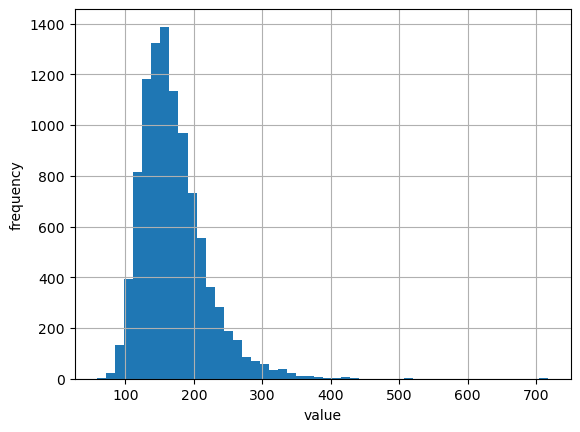

In [34]:
plt.hist(S[-1],bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)

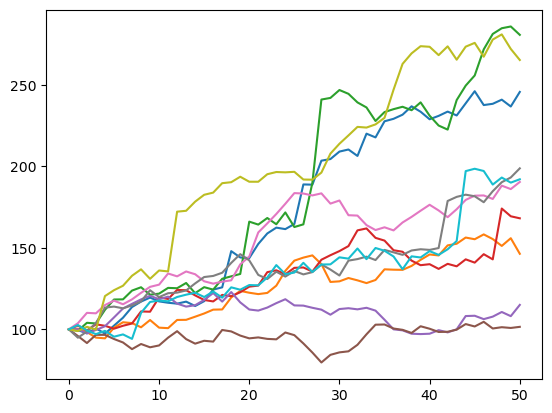

In [35]:
plt.plot(S[:,:10],lw=1.5)


In [36]:
for i in range(1,31,2):
    npr.seed(1000)
    sn=npr.standard_normal(i**2*10000)
    print('%15.12f %15.12f'%(sn.mean(),sn.std()))

-0.011870394558  1.008752430725
-0.002815667298  1.002729536352
-0.003847776704  1.000594044165
-0.003058113374  1.001086345326
-0.001685126538  1.001630849589
-0.001175212007  1.001347684642
-0.000803969036  1.000159081432
-0.000601970954  0.999506522127
-0.000147787693  0.999571756099
-0.000313035581  0.999646153704
-0.000178447061  0.999677277878
 0.000096501709  0.999684346792
-0.000135677013  0.999823841902
-0.000015726986  0.999906493379
-0.000039368519  1.000063091949


我们发现伪随机数并不能完美生成一个正态分布函数

In [37]:
sn=npr.standard_normal(5000)
sn=np.concatenate((sn,-sn))
sn.shape

(10000,)

In [38]:
for i in range(1,31,2):
    npr.seed(1000)
    sn=npr.standard_normal(i**2*10000)
    sn=np.concatenate((sn,-sn))
    print('%15.12f %15.12f'%(sn.mean(),sn.std()))

-0.000000000000  1.008822270155
 0.000000000000  1.002733489545
-0.000000000000  1.000601442435
-0.000000000000  1.001091016270
 0.000000000000  1.001632267102
 0.000000000000  1.001348374274
 0.000000000000  1.000159404564
-0.000000000000  0.999506703401
-0.000000000000  0.999571767024
-0.000000000000  0.999646202717
-0.000000000000  0.999677293805
-0.000000000000  0.999684351450
-0.000000000000  0.999823851107
-0.000000000000  0.999906493502
-0.000000000000  1.000063092724


# 估值

**欧式期权**

基于某种指数的欧式看涨期权到期日收益通过公式$h(S_{T})=max(S_{T}-K,0)$得出，其中$S_{T}$是到期日T的指数水平，K是行权价格。给定相关随机过程（例如几何布朗运动）的风险中立测度。

_风险中立预期定价_
$$
C_{0}=e^{-rT}E_{0}^{Q}(h(S_{T}))=e^{-rT}\int_{0}^{\inf}h(s)q(s)ds
$$

_风险中立蒙特卡洛模拟公式_
$$
\widetilde{C_{0}}=e^{-rT}\frac{1}{I}\sum^{I}_{i=1}h(\tilde{S_{T}^{I}})
$$
其中$\tilde{S_{T}^{I}}$是到期日的dii个模拟水平


In [39]:
S0=100
r=0.05
sigma=0.25
T=1
I=50000
def gbm_mcs_stat(K):
    sn=npr.standard_normal((1,I))
    ST=S0*np.exp((r-0.5*sigma**2)*T+sigma*np.sqrt(T)*sn[0])
    hT=np.maximum(ST-K,0)
    C0=np.exp(-r*T)*1/I*np.sum(hT)
    return C0

In [40]:
gbm_mcs_stat(K=105)

9.984415692188293

In [41]:
M=50
def gbm_mcs_dyna(K,option='call'):
    dt=T/M
    S=np.zeros((M+1,I))
    S[0]=S0
    sn=npr.standard_normal((M,I))
    for t in range(1,M+1):
        S[t]=S[t-1]*np.exp((r-0.5*sigma**2)*dt+sigma*np.sqrt(dt)*sn[t-1])
    if option=='call':
        hT=np.maximum(S[-1]-K,0)
    else:
        hT=np.maximum(K-S[-1],0)
    C0=np.exp(-r*T)*1/I*np.sum(hT)
    return C0

In [42]:
gbm_mcs_dyna(K=110,option='call')

8.111788694114738

In [43]:
gbm_mcs_dyna(K=110,option='put')

12.614183903319875

In [44]:
def bsm_call_value(S0,K,T,r,sigma):
    from math import sqrt, log,exp
    from scipy import stats
    S0=float(S0)
    d1=(log(S0/K)+(r+0.5*sigma**2)*T)/(sigma*sqrt(T))
    d2=(log(S0/K)+(r-0.5*sigma**2)*T)/(sigma*sqrt(T))
    
    value=S0*stats.norm.cdf(d1,0,1)-exp(-r*T)*K*stats.norm.cdf(d2,0,1)
    return value

stat_res=[]
dyna_res=[]
anal_res=[]
k_list=np.arange(80,120.1,5)
np.random.seed(200000)
for k in k_list:
    stat_res.append(gbm_mcs_stat(k))
    dyna_res.append(gbm_mcs_dyna(k))
    anal_res.append(bsm_call_value(S0,k,T,r,sigma))
stat_res=np.array(stat_res)
dyna_res=np.array(dyna_res)
anal_res=np.array(anal_res)

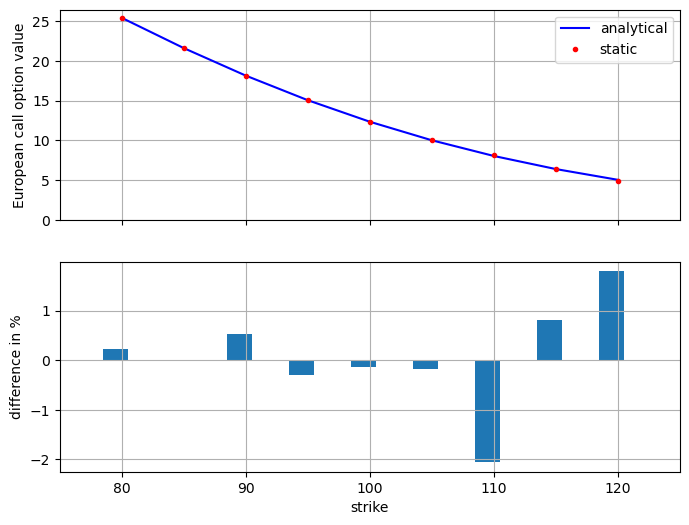

In [45]:
#静态动态进行比较
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True,figsize=(8,6))
ax1.plot(k_list,anal_res,'b',label='analytical')
ax1.plot(k_list,stat_res,'r.',label='static')
ax1.set_ylabel('European call option value')
ax1.grid(True)
ax1.legend(loc=0)
ax1.set_ylim(ymin=0)
wi=1.0
ax2.bar(k_list-wi/2,(anal_res-stat_res)/anal_res*100,2)
ax2.set_xlabel('strike')
ax2.set_ylabel('difference in %')
ax2.set_xlim(left=75,right=125)
ax2.grid(True)

# 美式期权

_以最优截止问题形式出现的美式期权价格_
$$
V_{0}=sup e^{-rT}E_{0}^{Q}(h_{T}(S_{}T))
$$
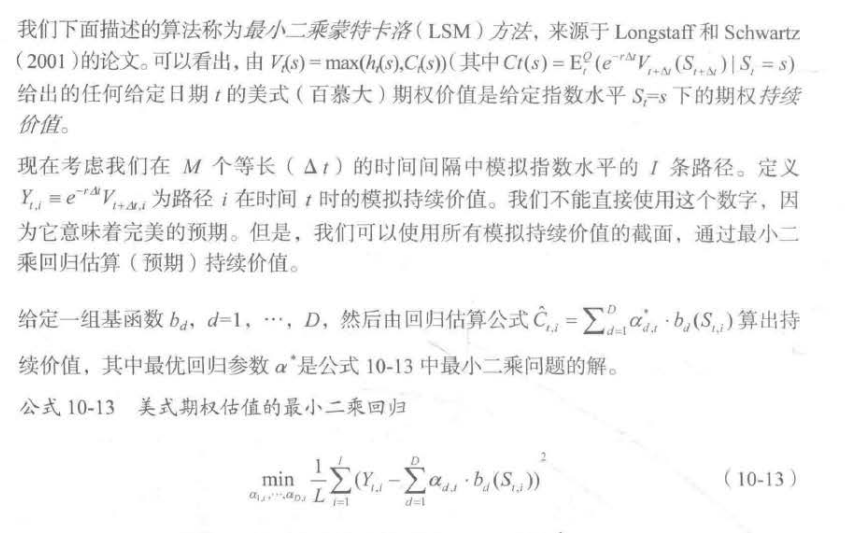

In [46]:
 def gbm_mcs_amer(K,option='call'):
        dt=T/M
        df=np.exp(-r*dt)
        S=np.zeros((M+1,I))
        S[0]=S0
        sn=npr.standard_normal((M,I))
        for t in range(1,M+1):
            S[t]=S[t-1]*np.exp((r-0.5*sigma**2)*dt+sigma*np.sqrt(dt)*sn[t-1])
        if option=='call':
            h=np.maximum(S-K,0)
        else:
            h=np.maximum(K-S,0)
        #LSM算法
        V=np.copy(h)
        for t in range(M-1,0,-1):
            reg=np.polyfit(S[t],V[t+1]*df,7)#进行拟合
            C=np.polyval(reg,S[t])
            V[t]=np.where(C>h[t],V[t+1]*df,h[t])
        C0=df*1/I*np.sum(V[1])
        return C0

In [47]:
gbm_mcs_amer(110,option='call')

7.789947614445153

In [48]:
gbm_mcs_amer(110,option='put')

13.677604253486495

# 风险测度

In [49]:
S0=100
r=0.05
sigma=0.25
T=30/365
I=10000
St=S0*np.exp((r-0.5*sigma**2)*dt+sigma*np.sqrt(T)*npr.standard_normal(I))


In [50]:
R_gbm=np.sort(St-S0)

In [51]:
R_gbm.shape

(10000,)

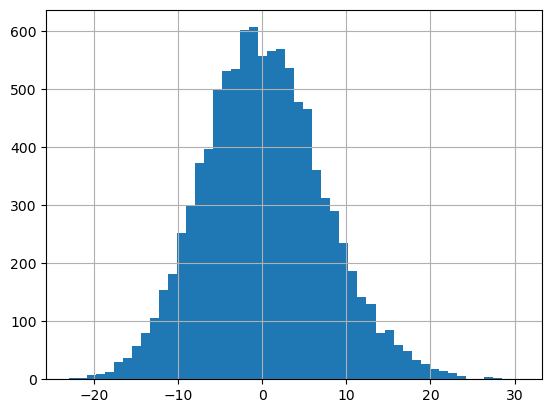

In [52]:
plt.hist(R_gbm,bins=50)
plt.grid(True)

In [53]:
import scipy.stats as scs
percs=[0.01,0.1,1,2.5,5,10]
var=scs.scoreatpercentile(R_gbm,percs)
print('%16s %16s'%('Confidence Level','Value-at-Risk'))
print(33*'-')
for pair in zip(percs,var):
    print('%16.2f %16.3f'%(100-pair[0],-pair[1]))
    

Confidence Level    Value-at-Risk
---------------------------------
           99.99           22.585
           99.90           20.088
           99.00           15.459
           97.50           13.121
           95.00           11.149
           90.00            8.815


In [54]:
dt=30/365/M
rj=lamb*(np.exp(mu+0.5*sigma**2)-1)
S=np.zeros((M+1,I))
S[0]=S0
sn1=npr.standard_normal((M+1,I))
sn2=npr.standard_normal((M+1,I))
poi=npr.poisson(lamb*dt,(M+1,I))
for t in range(1,M+1,1):
    S[t]=S[t-1]*(np.exp((r-rj-0.5*sigma**2)*dt+sigma*np.sqrt(dt)*sn1[t])+(np.exp(mu+delta*sn2[t])-1)*poi[t])
    S[t]=np.maximum(S[t],0)

In [55]:
R_jd=np.sort(S[-1]-S0)

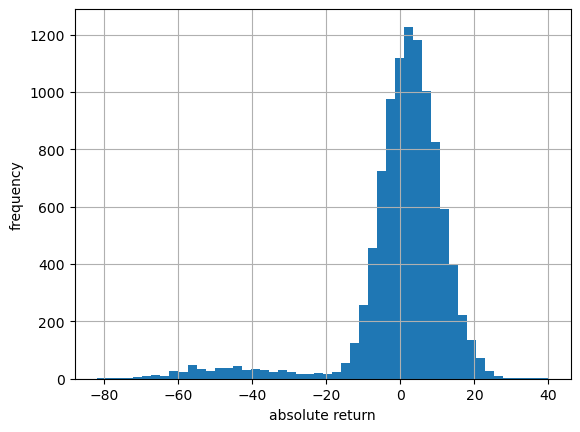

In [56]:
plt.hist(R_jd,bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency')
plt.grid(True)

In [57]:
percs=[0.01,0.1,1,2.5,5,10]
var=scs.scoreatpercentile(R_jd,percs)
for pair in zip(percs,var):
    print('%16.2f %16.3f'%(100-pair[0],-pair[-1]))

           99.99           79.063
           99.90           70.390
           99.00           57.250
           97.50           47.320
           95.00           28.636
           90.00            9.041


In [58]:
percs=list(np.arange(0,10.1,0.1))
gbm_var=scs.scoreatpercentile(R_gbm,percs)
jd_var=scs.scoreatpercentile(R_jd,percs)


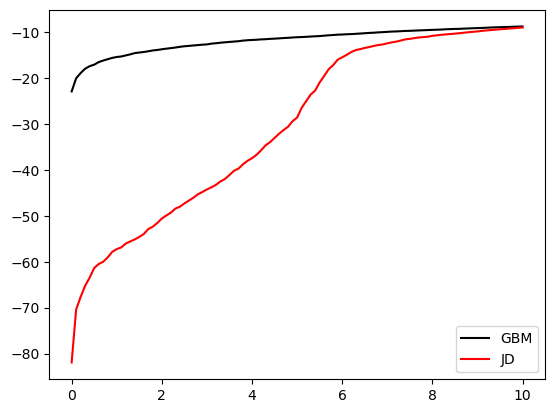

In [59]:
plt.plot(percs,gbm_var,'k',lw=1.5,label='GBM')
plt.plot(percs,jd_var,'r',lw=1.5,label='JD')
plt.legend(loc=4)


# 信用价值调整

**违约概率和平均损失水平**

In [60]:
S0=100
r=0.05
T=1
I=100000
ST=S0*np.exp((r-0.5*sigma**2)*T+sigma*np.sqrt(T)*npr.standard_normal(I))


In [62]:
L=0.5#固定平均损失水平
p=0.01#对手违约概率

In [63]:
D=npr.poisson(p*T,I)
D=np.where(D>1,1,D)


In [64]:
#资产现值计算
np.exp(-r*T)*1/I*np.sum(ST)

100.07712684984442

In [67]:
CVaR=np.exp(-r*T)*1/I*np.sum(L*D*ST)
CVaR

0.5001927620593389

In [69]:
#经过信用风险调整过后的资产现值计算
S0_CVA=np.exp(-r*T)*1/I*np.sum((1-L*D)*ST)
S0_CVA

99.5769340877851

In [71]:
S0_adj=S0-CVaR
S0_adj

99.49980723794066

In [72]:
np.count_nonzero(L*D*ST)

998

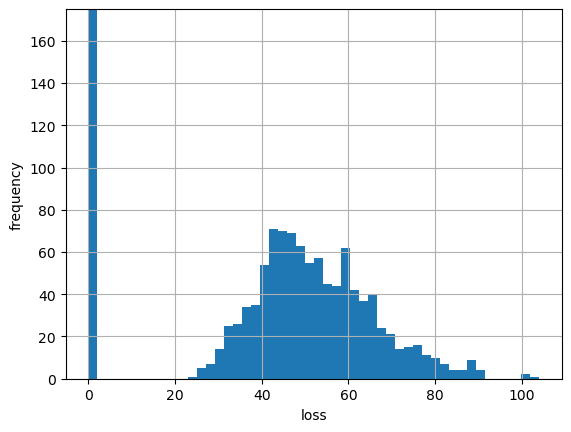

In [74]:
plt.hist(L*D*ST,bins=50)
plt.xlabel('loss')
plt.ylabel('frequency')
plt.ylim(ymax=175)
plt.grid(True)

In [75]:
K=100
hT=np.maximum(ST-K,0)
C0=np.exp(-r*T)*1/I*np.sum(hT)
C0

12.384278112411723

In [77]:
CVaR=np.exp(-r*T)*1/I*np.sum(L*D*hT)
CVaR

0.06340450322598806

In [78]:
C0_CVA=np.exp(-r*T)*1/I*np.sum((1-L*D)*hT)
C0_CVA

12.320873609185735